# **SIMPLIFIED SELF ATTENTION**

In [11]:
import torch

input = torch.tensor(
    [[0.72, 0.45, 0.31],   ## Dream
     [0.75, 0.20, 0.55],   ## big
     [0.30, 0.80, 0.40],   ## and
     [0.85, 0.35, 0.60],   ## work
     [0.55, 0.15, 0.75],   ## for
     [0.20, 0.20, 0.85]]   ## it
)

In [12]:
input.shape[0], input.shape[1]

(6, 3)

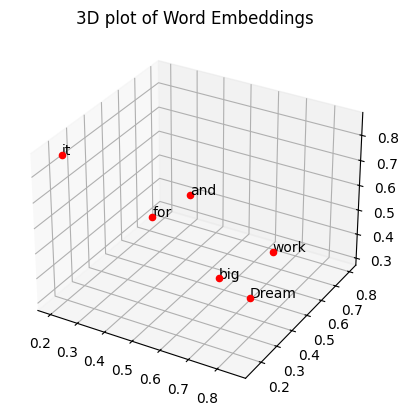

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['Dream', "big", "and", "work", "for", "it"]

x_cords = input[:, 0].numpy()
y_cords = input[:, 1].numpy()
z_cords = input[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x, y, z, word in zip(x_cords, y_cords, z_cords, words):
    ax.scatter(x, y, z, color="red")
    ax.text(x, y, z, s=word)

ax.set_label("x")
ax.set_label("y")
ax.set_label("z")

plt.title("3D plot of Word Embeddings")
plt.show()

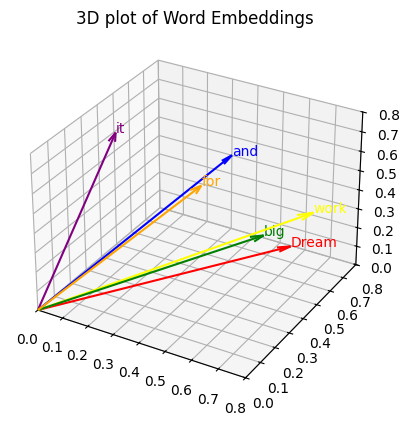

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

for (x, y, z, word, color) in zip(x_cords, y_cords, z_cords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, s=word, color=color)

ax.set_label("x")
ax.set_label("y")
ax.set_label("z")

ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
ax.set_zlim(0, 0.8)

plt.title("3D plot of Word Embeddings")
plt.show()

In [15]:
query = input[1]  ## Taking 2nd Input token as query

attn_score_2 = torch.empty(input.shape[0])

for i, x_i in enumerate(input):
    attn_score_2[i] = torch.dot(query, x_i)

print(attn_score_2)

tensor([0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6575])


In [16]:
attn_weights_2_temp = attn_score_2 / attn_score_2.sum()

print(attn_weights_2_temp)
print(attn_weights_2_temp.sum())

tensor([0.1647, 0.1862, 0.1245, 0.2135, 0.1759, 0.1353])
tensor(1.0000)


In [17]:
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_score_2)

print(attn_weights_2_naive)
print(attn_weights_2_naive.sum())

tensor([0.1633, 0.1813, 0.1343, 0.2070, 0.1725, 0.1416])
tensor(1.0000)


In [18]:
attn_weights_2 = torch.softmax(attn_score_2, dim=0)

print(attn_weights_2)
print(attn_weights_2.sum())

tensor([0.1633, 0.1813, 0.1343, 0.2070, 0.1725, 0.1416])
tensor(1.0000)


In [19]:
query = input[0]  ## Taking 1st Input token as query

context_vector = torch.zeros(input.shape[1])

for i, x_i in enumerate(input):
    context_vector += attn_weights_2[i] * x_i

print(context_vector)

tensor([0.5930, 0.3439, 0.5780])


In [20]:
attn_scores = torch.empty(input.shape[0], input.shape[0])

for i, x_i in enumerate(input):
    for j, x_j in enumerate(input):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.4975],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6575],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5600],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7500],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.7775],
        [0.4975, 0.6575, 0.5600, 0.7500, 0.7775, 0.8025]])


In [21]:
import pandas as pd

pd.DataFrame(attn_scores.numpy(), columns=words, index=words)

,Dream,big,and,work,for,it
Dream,0.8170,0.8005,0.700,0.9555,0.6960,0.4975
big,0.8005,0.9050,0.605,1.0375,0.8550,0.6575
and,0.7000,0.6050,0.890,0.7750,0.5850,0.5600
work,0.9555,1.0375,0.775,1.2050,0.9700,0.7500
for,0.6960,0.8550,0.585,0.9700,0.8875,0.7775
it,0.4975,0.6575,0.560,0.7500,0.7775,0.8025


In [23]:
input @ input.T

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.4975],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6575],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5600],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7500],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.7775],
        [0.4975, 0.6575, 0.5600, 0.7500, 0.7775, 0.8025]])

In [24]:
attn_weights = torch.softmax(attn_scores, dim=1)

print(attn_weights)

tensor([[0.1775, 0.1746, 0.1579, 0.2038, 0.1573, 0.1289],
        [0.1633, 0.1813, 0.1343, 0.2070, 0.1725, 0.1416],
        [0.1679, 0.1527, 0.2030, 0.1809, 0.1496, 0.1459],
        [0.1658, 0.1799, 0.1384, 0.2127, 0.1682, 0.1350],
        [0.1497, 0.1755, 0.1340, 0.1969, 0.1813, 0.1624],
        [0.1388, 0.1629, 0.1477, 0.1787, 0.1836, 0.1883]])


In [25]:
all_context_vectors = attn_weights @ input

print(all_context_vectors)

tensor([[0.5916, 0.3618, 0.5640],
        [0.5930, 0.3439, 0.5780],
        [0.5615, 0.3834, 0.5620],
        [0.5962, 0.3480, 0.5742],
        [0.5793, 0.3383, 0.5888],
        [0.5569, 0.3410, 0.5967]])
